# Sentiment 140 Demo

In [1]:
import requests

APP_ID = 'joswine@vcu.edu'
URL = "http://www.sentiment140.com/api/bulkClassifyJson?appid=" + APP_ID

print(URL)

import json
def send_request(data):

    r = requests.post(URL, data=data)
    if r.status_code == 200:
        try:
            response = json.loads(r.text)
            polarity = response['data'][0]['polarity']
            if polarity == 4:
                return "Positive"
            elif polarity == 0:
                return "Negative"
            else:
                return "Neutral"
        except Exception as e:
            print("Exception")
            print(e.message)
            

http://www.sentiment140.com/api/bulkClassifyJson?appid=joswine@vcu.edu


In [2]:
import json
data = [
    {
        "text": "Hi, You are bad!"
    }
]
payload = {'data': data}
resp = send_request(json.dumps(payload))
print(resp)


Neutral


## Naive Bayes Classifier - Movie reviews



In [22]:

# Do this if you are haven't already downloaded the corpus
# nltk.download('movie_reviews') 
from nltk.corpus import movie_reviews

movie_reviews.categories() # ['pos', 'neg']
movie_reviews.fileids('pos') 

negids = movie_reviews.fileids('neg') 
posids = movie_reviews.fileids('pos') 

a = movie_reviews.words(fileids=['pos/cv000_29590.txt']) # gives full word list, with duplicates
print(a[:25])

['films', 'adapted', 'from', 'comic', 'books', 'have', 'had', 'plenty', 'of', 'success', ',', 'whether', 'they', "'", 're', 'about', 'superheroes', '(', 'batman', ',', 'superman', ',', 'spawn', ')', ',']


In [34]:
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier

def word_feats(words):
    return dict([(word, True) for word in words])

negids = movie_reviews.fileids('neg')
posids = movie_reviews.fileids('pos')

# print((word_feats(movie_reviews.words(fileids=['pos/cv000_29590.txt'])), 'neg'))
negfeats = [(word_feats(movie_reviews.words(fileids=[f])), 'neg') for f in negids]
posfeats = [(word_feats(movie_reviews.words(fileids=[f])), 'pos') for f in posids]

# len(negfeats)

negcutoff = int(len(negfeats)*3/4)
poscutoff = int(len(posfeats)*3/4)

trainfeats = negfeats[:negcutoff] + posfeats[:poscutoff]
testfeats = negfeats[negcutoff:] + posfeats[poscutoff:]
print( 'train on %d instances, test on %d instances' , (len(trainfeats), len(testfeats)) )

classifier = NaiveBayesClassifier.train(trainfeats)

print( 'accuracy:', nltk.classify.util.accuracy(classifier, testfeats) )



train on %d instances, test on %d instances (1500, 500)
accuracy: 0.728


In [ ]:
classifier.show_most_informative_features()


In [24]:
pos_r1 = """With great visuals, lovely set design, and interesting stories that contain 
    a lot of classic elements as well as some great twists, 'Trick 'r' Treat' is an anthology
    of interconnected stories that is all about reminding you what Halloween is about and 
    reconnecting you with that gleeful feeling you had when you were a kid, running around 
    trick 'r' treating in your costume. Michael Dougherty has crafted the perfect Halloween
    atmosphere here, but it may not be to everyone's liking with its somewhat camp tone. It's not
    going to scare your pants off, but it sure is a ridiculous amount of fun and, to me, it is
    the ultimate Halloween viewing and a must-watch when October rolls around. """

pos_r2 = "magnificent outstanding insulting fascination astounding"

neg_r1 = """This year (2017) I finally caved in and watched Trick 'r Treat . . . 
        and what a straight up boring movie it was.
        Not a single story was entertaining. 
        Sam and the dog are cute, that's the only good I can say."""

neg_r2 = """A hodgepodge that occasionally entertains."""

def word_feats2(words):
    words = words.split(' ')
    return dict([(word, True) for word in words])

classifier.classify(word_feats2(neg_r2))

'neg'

### Movie Reviews - Naive Bayes with bigrams

In [99]:
# print(trainfeats[2])
from nltk.tokenize import RegexpTokenizer
import string

tokens = {ord(c):'' for c in string.punctuation + string.digits}

def ngram_words_feat(words, n):
    words = words.translate(d)
    words = words.split()
    if n == 1:
       return dict([(word, True) for word in words]) 
    elif n == 2:
        tupl = zip( words[:-1], words[1:] )
    elif n == 3:
        tupl = zip( words[:-1], words[1:], words[2:] )
    elif n == 4:
        tupl = zip( words[:-1], words[1:], words[2:], words[3:] )
    else:
        tupl = zip( words[:-1], words[1:], words[2:], words[3:], words[4:] )
    
    return dict( [ (bigr, True) for bigr in tupl ] )


def run(n):
    negfeats = [(ngram_words_feat(movie_reviews.raw(fileids=[f]), n), 'neg') for f in negids]
    posfeats = [(ngram_words_feat(movie_reviews.raw(fileids=[f]), n), 'pos') for f in posids]

    negcutoff = int(len(negfeats)*3/4)
    poscutoff = int(len(posfeats)*3/4)

    trainfeats = negfeats[:negcutoff] + posfeats[:poscutoff]
    testfeats = negfeats[negcutoff:] + posfeats[poscutoff:]

    print( 'train on %d instances, test on %d instances' , (len(trainfeats), len(testfeats)) )

    classifier = NaiveBayesClassifier.train(trainfeats)
    
    return nltk.classify.util.accuracy(classifier, testfeats)
#     print( 'accuracy:', nltk.classify.util.accuracy(classifier, testfeats) )




In [100]:
# accuracy = run(1)
ns = range(1,8)
accuracies = []
for i in ns:
    print(" Running %d gram" %(i) )
    acc = run(i)
#     print(type(acc))
    print( "Accuracy obtained :" ,acc )
    accuracies.append(acc)


 Running 1 gram
train on %d instances, test on %d instances (1500, 500)
Accuracy obtained : 0.72
 Running 2 gram
train on %d instances, test on %d instances (1500, 500)
Accuracy obtained : 0.754
 Running 3 gram
train on %d instances, test on %d instances (1500, 500)
Accuracy obtained : 0.786
 Running 4 gram
train on %d instances, test on %d instances (1500, 500)
Accuracy obtained : 0.754
 Running 5 gram
train on %d instances, test on %d instances (1500, 500)
Accuracy obtained : 0.674


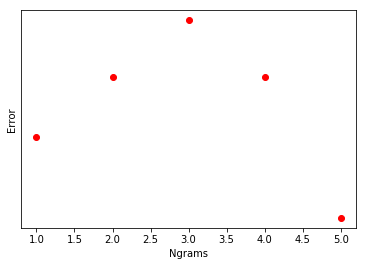

In [108]:
%matplotlib inline
import matplotlib.pyplot as plt
accuracies = [1-i for i in accuracies]
plt.plot(ns, accuracies, 'ro')
plt.xlabel('Ngrams')
plt.ylabel('Error')
plt.show()